In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
#Load data
df = pd.read_csv("financial_sentiment_data.csv")
df.head() 

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
df.shape 

(5836, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5836 non-null   object
 1   Sentiment  5836 non-null   object
dtypes: object(2)
memory usage: 91.3+ KB


In [6]:
df.dtypes

Sentence     object
Sentiment    object
dtype: object

In [7]:
df['Sentiment'].value_counts()

neutral     3124
positive    1852
negative     860
Name: Sentiment, dtype: int64

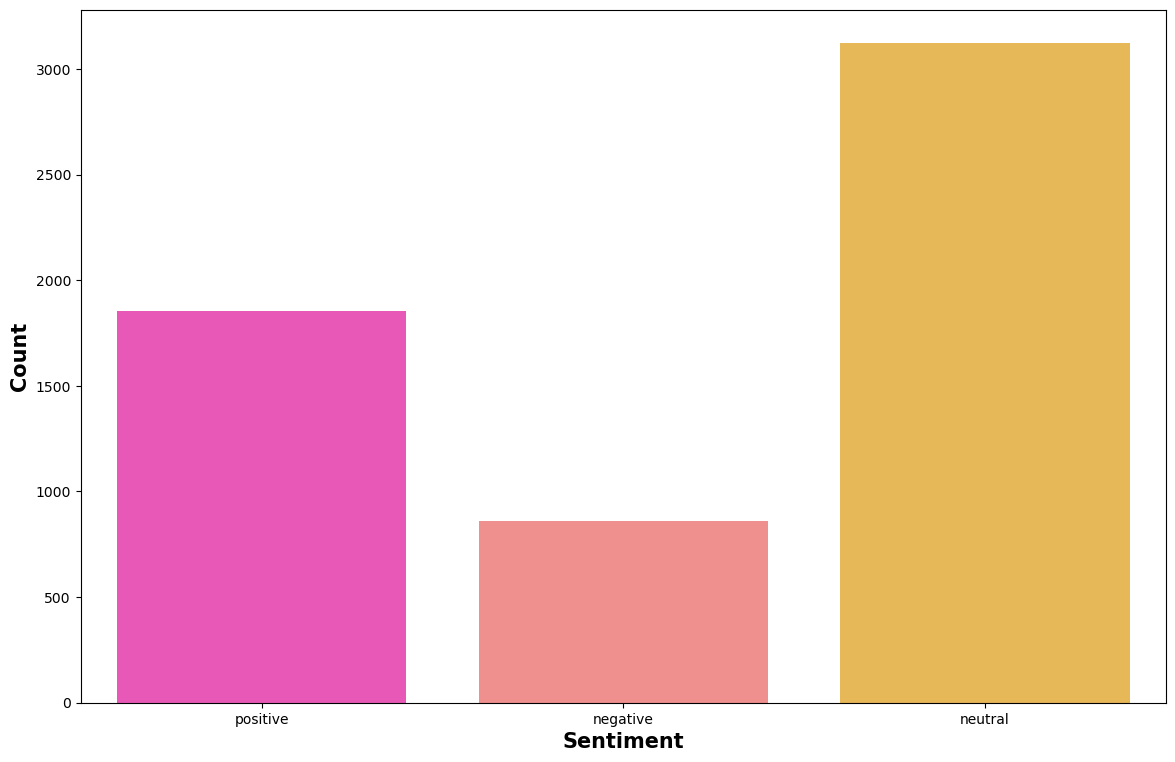

In [8]:
plt.figure(figsize=(14,9))
sns.countplot(x = 'Sentiment',data=df,palette ='spring')
plt.xlabel("Sentiment",fontweight='bold',size=15)
plt.ylabel("Count",fontweight='bold',size=15)
plt.show()

<AxesSubplot:>

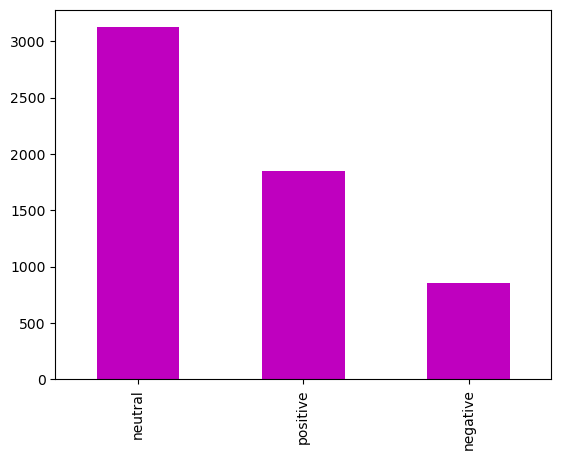

In [9]:
df["Sentiment"].value_counts().plot(kind = "bar", color = "m")

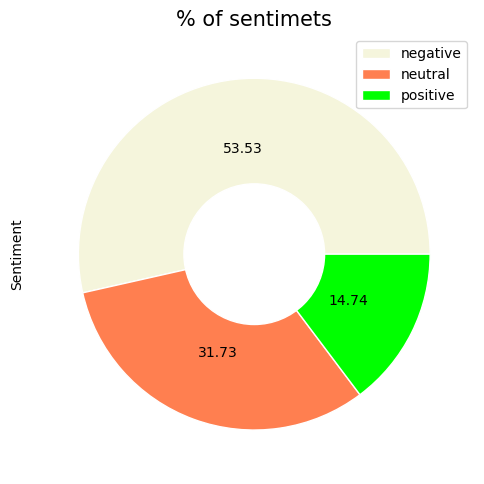

In [10]:
#Pie chart
colors = ['#F5F5DC', '#FF7F50', '#00FF00']
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.Sentiment.value_counts().head(3).plot(kind='pie', labels=None, autopct='%.2f', ax=ax1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors).legend(labels={
                     "neutral",
                     "positive",
                     "negative"})
central_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('% of sentimets', size=15)
plt.tight_layout()
plt.show() 

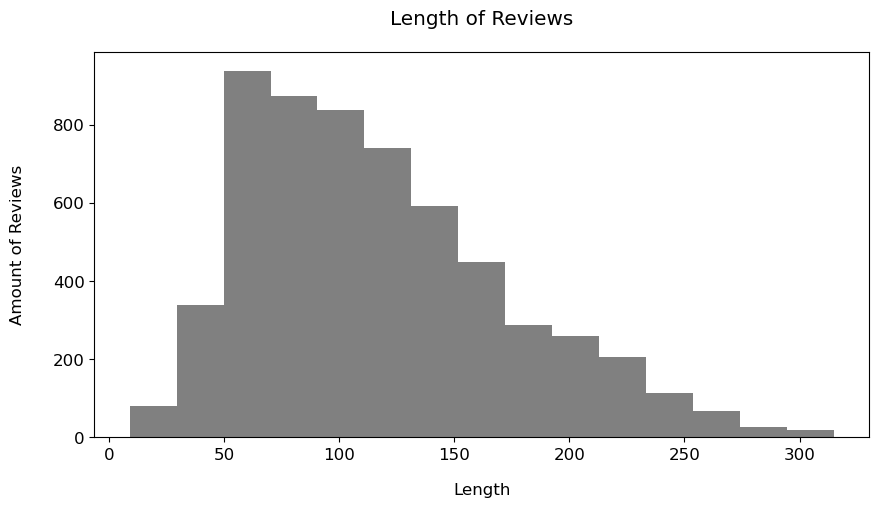

In [11]:
#Length of reviews
df["Length"] = df["Sentence"].astype(str).apply(len)
df["Length"].plot(kind = "hist", bins = 15, linewidth = 1, color = "grey", figsize = (10,5))
plt.title("Length of Reviews", pad = 20)
plt.xlabel("Length", labelpad = 15)
plt.ylabel("Amount of Reviews",labelpad = 20)
plt.show() 

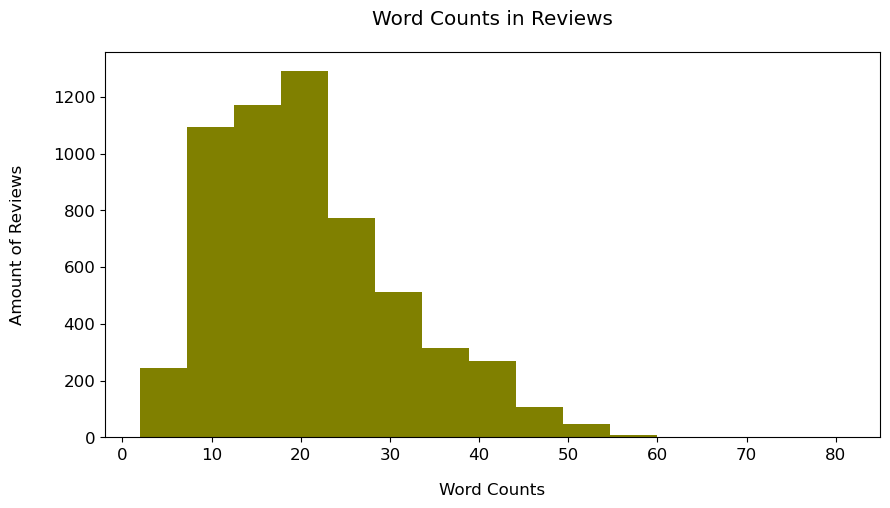

In [12]:
#Word counts
df["Word Counts"] = df["Sentence"].apply(lambda x: len(str(x).split()))
df["Word Counts"].plot(kind = "hist", bins = 15, linewidth = 1, color = "olive", figsize = (10,5))
plt.title("Word Counts in Reviews", pad = 20)
plt.xlabel("Word Counts", labelpad = 15)
plt.ylabel("Amount of Reviews", labelpad = 20)
plt.show()

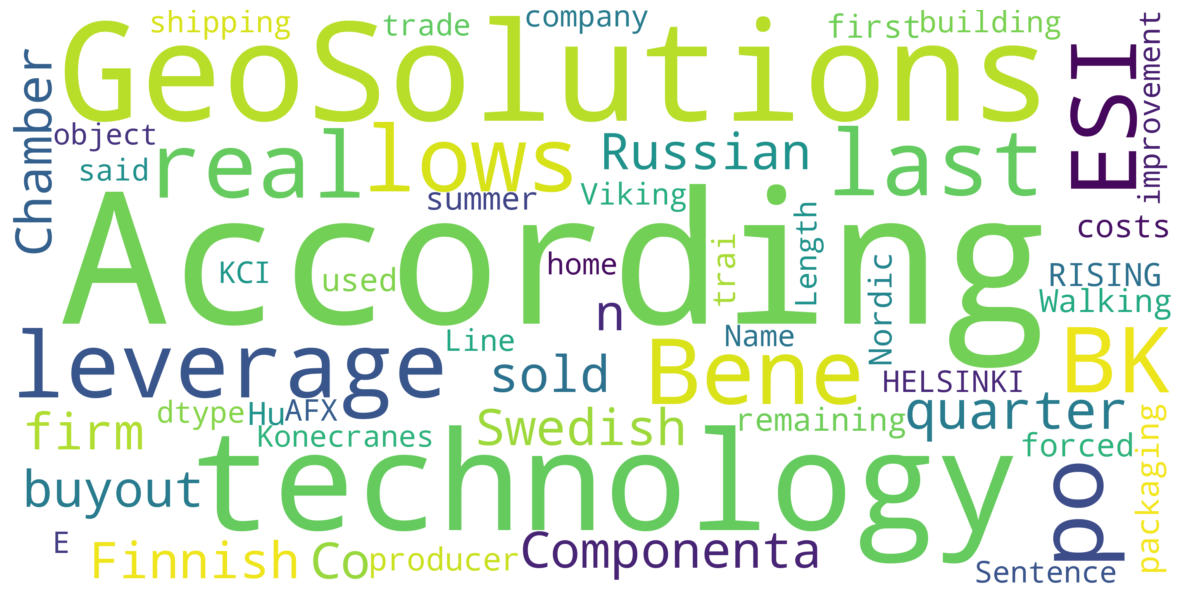

In [13]:
#WordCloud
from wordcloud import WordCloud, ImageColorGenerator
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])
wc= WordCloud(background_color="white",random_state=1, max_words=2000, width = 3000, height = 1500, stopwords = Stopwords).generate(str(df["Sentence"]))
plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

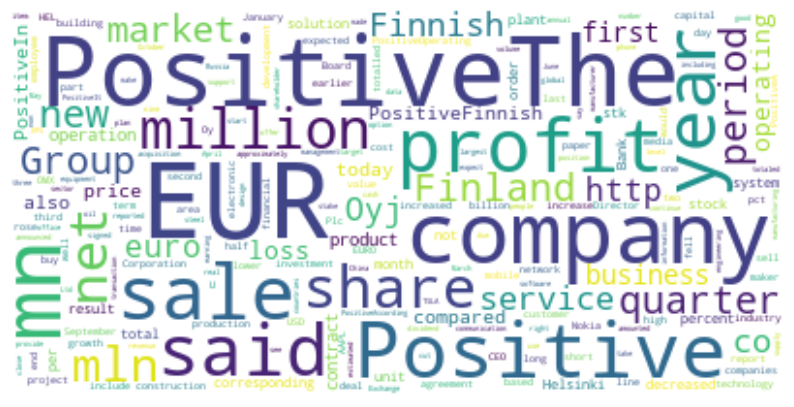

In [14]:
#Creating word cloud for positive sentiment
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])
wc=WordCloud(stopwords=Stopwords, collocations=False, max_font_size=55, max_words=1000, background_color="white")
wc.generate('Positive'.join(df.Sentence))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

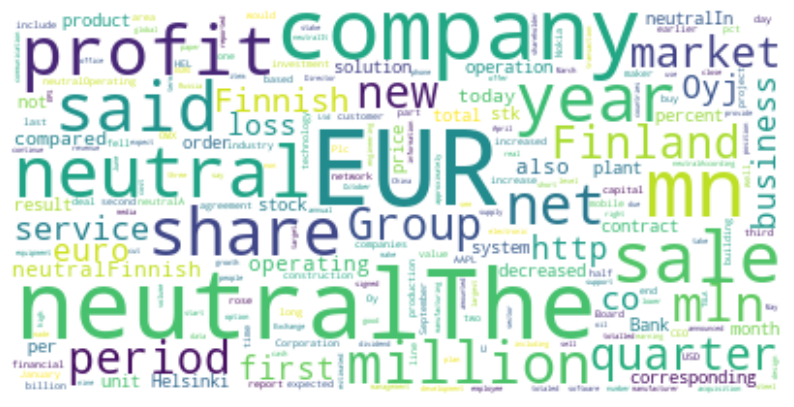

In [15]:
#Creating word cloud for neutral sentiment
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])
wc=WordCloud(stopwords=Stopwords, collocations=False, max_font_size=55, max_words=1000, background_color="white")
wc.generate('neutral'.join(df.Sentence))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

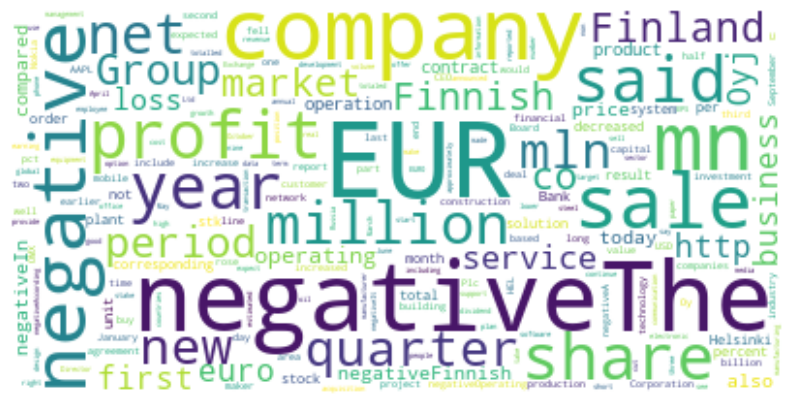

In [16]:
#Creating word cloud for negative sentiment
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])
wc=WordCloud(stopwords=Stopwords, collocations=False, max_font_size=55, max_words=1000, background_color="white")
wc.generate('negative'.join(df.Sentence))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
def convert_target(targets):
    sent = {'positive': 1, 'neutral': 0 , 'negative': -1}
    return df.Sentiment.map(sent) 
df.Sentiment=convert_target(df.Sentiment) 

In [18]:
df

,Sentence,Sentiment,Length,Word Counts
0,The GeoSolutions technology will leverage Bene...,1,218,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-1,55,11
2,"For the last quarter of 2010 , Componenta 's n...",1,193,39
3,According to the Finnish-Russian Chamber of Co...,0,128,20
4,The Swedish buyout firm has sold its remaining...,0,135,23
...,...,...,...,...
5831,RISING costs have forced packaging producer Hu...,-1,107,17
5832,Nordic Walking was first used as a summer trai...,0,83,14
5833,"According shipping company Viking Line , the E...",0,99,16
5834,"In the building and home improvement trade , s...",0,88,18


In [19]:
df.duplicated(['Sentence']).sum() 

514

In [20]:
df2 = df[df.duplicated(['Sentence'])]
df2 

,Sentence,Sentiment,Length,Word Counts
266,Finnish GeoSentric 's net sales decreased to E...,0,80,13
283,Sales in Finland decreased by 10.5 % in Januar...,-1,95,19
349,Full-year operating result for 2008 was 3.6 mi...,-1,62,10
387,"Making matters more difficult , the company sa...",-1,180,33
496,"Antti Orkola , president of Kemira GrowHow 's ...",-1,215,40
...,...,...,...,...
5821,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",-1,231,50
5825,Finnish developer and manufacturer of mobile p...,-1,160,25
5826,Operating profit fell to EUR 38.1 mn from EUR ...,-1,63,14
5831,RISING costs have forced packaging producer Hu...,-1,107,17


In [21]:
df.shape

(5836, 4)

In [22]:
df['Sentiment'].value_counts()

 0    3124
 1    1852
-1     860
Name: Sentiment, dtype: int64

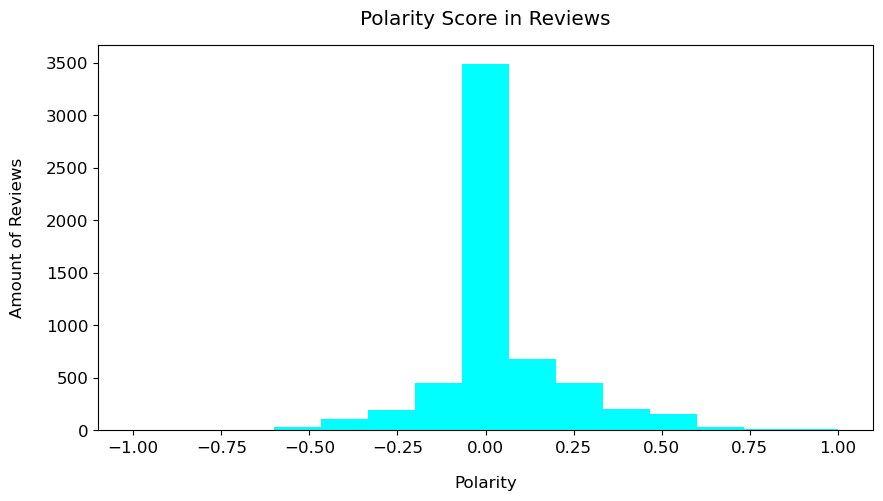

In [23]:
#Polarity scores
from textblob import TextBlob
df["Polarity"] = df["Sentence"].map(lambda Text: TextBlob(Text).sentiment.polarity)
df["Polarity"].plot(kind = "hist", bins = 15, linewidth = 1, color = "cyan", figsize = (10,5))

plt.title("Polarity Score in Reviews", pad = 15)
plt.xlabel("Polarity", labelpad = 15)

plt.ylabel("Amount of Reviews", labelpad = 15)
plt.show() 

In [24]:
df = [Sentence.strip() for Sentence in df.Sentence] # remove both the leading and the trailing characters
df = [Sentence for Sentence in df if Sentence] # removes empty strings, because they are considered in Python as False

In [25]:
df[0:10] 

["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",
 '$ESI on lows, down $1.50 to $2.50 BK a real possibility',
 "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
 'According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .',
 'The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .',
 "$SPY wouldn't be surprised to see a green close",
 "Shell's $70 Billion BG Deal Meets Shareholder Skepticism",
 'SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and 

In [26]:
# Joining the list into one string/text
text = ' '.join(df)
text

'The GeoSolutions technology will leverage Benefon \'s GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model . $ESI on lows, down $1.50 to $2.50 BK a real possibility For the last quarter of 2010 , Componenta \'s net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m . According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia . The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland . $SPY wouldn\'t be surprised to see a green close Shell\'s $70 Billion BG Deal Meets Shareholder Skepticism SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to 

In [27]:
#Punctuation
import string
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'The GeoSolutions technology will leverage Benefon s GPS solutions by providing Location Based Search Technology  a Communities Platform  location relevant multimedia content and a new and powerful commercial model  ESI on lows down 150 to 250 BK a real possibility For the last quarter of 2010  Componenta s net sales doubled to EUR131m from EUR76m for the same period a year earlier  while it moved to a zero pretax profit from a pretax loss of EUR7m  According to the FinnishRussian Chamber of Commerce  all the major construction companies of Finland are operating in Russia  The Swedish buyout firm has sold its remaining 224 percent stake  almost eighteen months after taking the company public in Finland  SPY wouldnt be surprised to see a green close Shells 70 Billion BG Deal Meets Shareholder Skepticism SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14  2008 AT 245 PM The Company updates its full year outlook and estimates its results to remain at loss for the full year

In [28]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The', 'GeoSolutions', 'technology', 'will', 'leverage', 'Benefon', 's', 'GPS', 'solutions', 'by', 'providing', 'Location', 'Based', 'Search', 'Technology', 'a', 'Communities', 'Platform', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model', 'ESI', 'on', 'lows', 'down', '150', 'to', '250', 'BK', 'a', 'real', 'possibility', 'For', 'the', 'last', 'quarter', 'of', '2010', 'Componenta', 's', 'net', 'sales']


In [29]:
len(text_tokens) 

110022

In [30]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('not')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40]) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['The', 'GeoSolutions', 'technology', 'leverage', 'Benefon', 'GPS', 'solutions', 'providing', 'Location', 'Based', 'Search', 'Technology', 'Communities', 'Platform', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model', 'ESI', 'lows', '150', '250', 'BK', 'real', 'possibility', 'For', 'last', 'quarter', '2010', 'Componenta', 'net', 'sales', 'doubled', 'EUR131m', 'EUR76m', 'period']


In [31]:
#Noramalize the data
lower_words = [Sentence.lower() for Sentence in no_stop_tokens]
print(lower_words[0:25]) 

['the', 'geosolutions', 'technology', 'leverage', 'benefon', 'gps', 'solutions', 'providing', 'location', 'based', 'search', 'technology', 'communities', 'platform', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model', 'esi', 'lows', '150']


In [32]:
# NLP english language model of spacy library
import spacy
nlp = spacy.load('en_core_web_sm') 

In [33]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

The GeoSolutions technology leverage Benefon GPS solutions providing Location Based Search Technology Communities Platform location relevant multimedia content new powerful commercial model ESI lows 150 250 BK real possibility For last quarter 2010 Componenta net sales doubled EUR131m EUR76


In [34]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25]) 

['the', 'GeoSolutions', 'technology', 'leverage', 'Benefon', 'gps', 'solution', 'provide', 'Location', 'Based', 'Search', 'Technology', 'Communities', 'Platform', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model', 'ESI', 'low', '150']


# Feature Extraction

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =vectorizer.fit_transform(df)
print(vectorizer.get_feature_names())
print(tf_idf_matrix.toarray()) 

['00', '000', '000 euro', '000 euro mln', '000 for', '000 for the', '000 from', '000 in', '000 in the', '000 people', '000 sq', '000 square', '000 square metres', '000 tonnes', '000 tonnes of', '000 tons', '000 usd', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '10 000', '10 in', '10 million', '10 mln', '10 mn', '10 pct', '10 percent', '10 year', '100', '105', '11', '11 million', '11 mln', '11 mn', '110', '113', '12', '12 million', '12 mn', '12 month', '12 month period', '120', '13', '13 mn', '130', '133', '135', '14', '14 mn', '140', '15', '15 in', '15 mln', '15 mn', '15 mn compared', '150', '16', '16 mn', '17', '17 mn', '17 mn in', '18', '18 mn', '19', '20', '20 mln', '20 mn', '200', '200 000', '2000', '2001', '2003', '2004', '2005', '2005 to', '2006', '2006 and', '2006 from', '2006 from mln', '2007', '2007 and', '2007 down', '2007 from', '2007 to', '2008', '2008 and', '2008 at', '2008 compared', '2008 compared to', '2008 finnish', '2008 from', '2008 from eur', '2008 t

In [36]:
print(tf_idf_matrix.toarray()) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
x_vec = tf_idf_matrix.toarray()
x_vec 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X = x_vec
y = df['Sentiment'] 

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

# Naive Bayes Classifier

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report 

In [44]:
clf = MultinomialNB()
clf.fit(X_train,y_train) 

MultinomialNB()

In [45]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
clf.score(X_test,y_test)

0.7035306334371755

In [47]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

          -1       0.44      0.15      0.23       280
           0       0.73      0.89      0.80      1067
           1       0.68      0.62      0.65       579

    accuracy                           0.70      1926
   macro avg       0.62      0.56      0.56      1926
weighted avg       0.67      0.70      0.67      1926



# Support Vector Classifier

In [48]:
from sklearn.svm import SVC 

In [50]:
model = SVC(kernel = 'linear',class_weight='balanced',random_state = 0)
model.fit(X_train,y_train) 

SVC(class_weight='balanced', kernel='linear', random_state=0)

In [51]:
model_pred = model.predict(X_test)
model_pred

array([ 1,  0, -1, ...,  1,  0,  0], dtype=int64)

In [52]:
model.score(X_test, y_test) 

0.6905503634475597

In [53]:
print(classification_report(y_test, model_pred))  

              precision    recall  f1-score   support

          -1       0.39      0.59      0.47       280
           0       0.81      0.73      0.77      1067
           1       0.70      0.67      0.69       579

    accuracy                           0.69      1926
   macro avg       0.64      0.66      0.64      1926
weighted avg       0.72      0.69      0.70      1926



# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification   

In [56]:
model2 = RandomForestClassifier(class_weight='balanced')
model2.fit(X_train,y_train) 

RandomForestClassifier(class_weight='balanced')

In [57]:
model2_pred = model2.predict(X_test)
model2_pred

array([ 1,  0,  0, ..., -1,  0,  0], dtype=int64)

In [58]:
model2.score(X_test, y_test) 

0.652128764278297

In [59]:
print(classification_report(y_test, model2_pred))  

              precision    recall  f1-score   support

          -1       0.23      0.17      0.20       280
           0       0.70      0.81      0.75      1067
           1       0.72      0.59      0.65       579

    accuracy                           0.65      1926
   macro avg       0.55      0.53      0.53      1926
weighted avg       0.64      0.65      0.64      1926



# Decision Tree

In [60]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [61]:
model3 = DecisionTreeClassifier(criterion = 'entropy',class_weight='balanced',max_depth=30)
model3.fit(X_train,y_train) 

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30)

In [62]:
model3.score(X_test,y_test) 

0.5716510903426791

In [63]:
model3_pred = model3.predict(X_test)
model3_pred 

array([ 1,  0,  1, ..., -1,  0,  0], dtype=int64)

In [64]:
print(classification_report(y_test, model3_pred)) 

              precision    recall  f1-score   support

          -1       0.22      0.21      0.22       280
           0       0.69      0.66      0.67      1067
           1       0.53      0.59      0.56       579

    accuracy                           0.57      1926
   macro avg       0.48      0.49      0.48      1926
weighted avg       0.57      0.57      0.57      1926



# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
model4 = KNeighborsClassifier(n_neighbors=5,p=2)
model4.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
model4_pred = model4.predict(X_test)
model4_pred

array([-1, -1, -1, ...,  1,  0,  0], dtype=int64)

In [68]:
model4.score(X_test, y_test) 

0.5970924195223261

In [69]:
print(classification_report(y_test, model4_pred)) 

              precision    recall  f1-score   support

          -1       0.27      0.53      0.36       280
           0       0.75      0.71      0.73      1067
           1       0.68      0.42      0.52       579

    accuracy                           0.60      1926
   macro avg       0.57      0.55      0.54      1926
weighted avg       0.66      0.60      0.61      1926



# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model5 = LogisticRegression(multi_class='multinomial',class_weight='balanced')
model5.fit(X_train,y_train) 

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [72]:
model5_pred = model5.predict(X_test)
model5_pred

array([ 1,  0,  0, ..., -1,  0,  0], dtype=int64)

In [73]:
model5.score(X_test, y_test) 

0.6988577362409139

In [74]:
print(classification_report(y_test, model5_pred)) 

              precision    recall  f1-score   support

          -1       0.41      0.56      0.47       280
           0       0.81      0.74      0.78      1067
           1       0.70      0.68      0.69       579

    accuracy                           0.70      1926
   macro avg       0.64      0.66      0.65      1926
weighted avg       0.72      0.70      0.71      1926



In [75]:
import pickle 

In [138]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model5, open('filename', 'wb')) 

In [76]:
loaded_model = pickle.load(open('filename', 'rb')) 